In [18]:
import pandas as pd
df=pd.read_csv("C:/Users/DELL/Downloads/housing.data",header=None,sep='\s+')

In [19]:
df.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid',context='notebook')
cols = ['LSTAT','INDUS','NOX','RM','MEDV']
sns.pairplot(df[cols],size=2.5)
plt.show()

<Figure size 1250x1250 with 30 Axes>

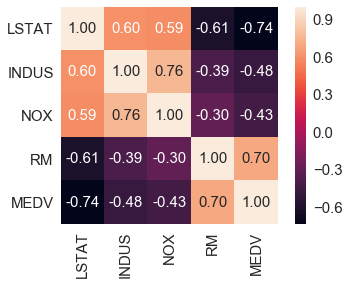

In [21]:
import numpy as np
cm=np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':15},yticklabels=cols,xticklabels=cols)
plt.show()

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
class LinearRegressionGD(object):
    def __init__(self,eta=0.001,n_iter=20):
        self.eta = eta
        self.n_iter = n_iter
    def fit(self,X,y):
        self.w_ = np.zeros(1+X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y-output)
            self.w_[1] += self.eta * X.T.dot(errors)
            self.w_[0]  += self.eta * errors.sum()
            cost = (errors**2).sum()/2.0
            self.cost_.append(cost)
        return self
    def net_input(self,X):
        #self.w_[1:] += self.eta*X.T.dot(errors)
        #self.w_[0]  += self.eta*errors.sum()
        return np.dot(X,self.w_[1]) + self.w_[0]
    def predict(self,X):
        return self.net_input(X)
        

In [24]:
X=df[["RM"]].values
y=df[["MEDV"]].values
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)
lr = LinearRegressionGD()
lr.fit(X_std,y_std)

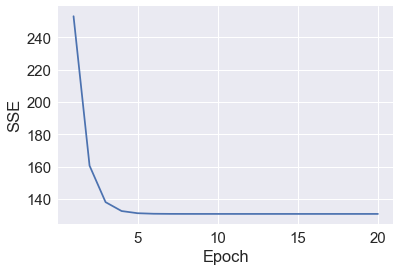

In [25]:
plt.plot(range(1,lr.n_iter+1),lr.cost_)
plt.ylabel("SSE")
plt.xlabel("Epoch")
plt.show()

In [26]:
def lin_regplot(X,y,model):
    plt.scatter(X,y,c='blue')
    plt.plot(X,model.predict(X),color='red')
    return None

Text(0,0.5,"price in $1000's [MEDV] (standardised)")

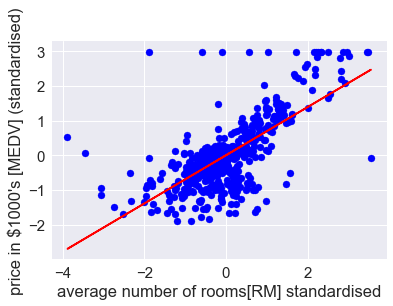

In [27]:
lin_regplot(X_std,y_std,lr)
plt.xlabel("average number of rooms[RM] standardised")
plt.ylabel("price in $1000\'s [MEDV] (standardised)")

In [28]:
number = sc_x.transform([[5.0]])
price_std = lr.predict(number)
print(price_std)
print("Price in $1000s: {}".format(sc_y.inverse_transform(price_std)[0][0]))
print("slope: %.3f"%lr.w_[1])
print("intercept: %.3f"%lr.w_[0])

[[-1.27262285]]
Price in $1000s: 10.839932888584524
slope: 0.695
intercept: -0.000


In [29]:
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import LinearRegression
ransac = RANSACRegressor(LinearRegression(),max_trials=100,min_samples=50,residual_threshold=5.0,random_state=0)
ransac.fit(X,y)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                                n_jobs=None, normalize=False),
                is_data_valid=None, is_model_valid=None, loss='absolute_loss',
                max_skips=inf, max_trials=100, min_samples=50, random_state=0,
                residual_threshold=5.0, stop_n_inliers=inf,
                stop_probability=0.99, stop_score=inf)

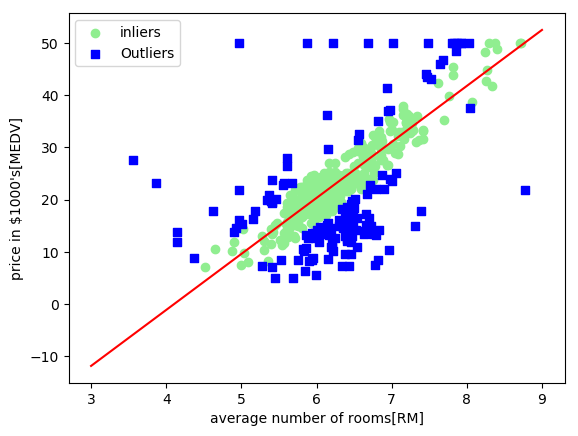

In [30]:
sns.reset_orig()
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3,10,1)
line_y_ransac = ransac.predict(line_X[:,np.newaxis])
plt.scatter(X[inlier_mask],y[inlier_mask],c='lightgreen',marker='o',label = "inliers")
plt.scatter(X[outlier_mask],y[outlier_mask],c='blue',marker='s',label='Outliers')
plt.plot(line_X,line_y_ransac,color='red')
plt.xlabel("average number of rooms[RM]")
plt.ylabel("price in $1000\'s[MEDV]")
plt.legend(loc="upper left")
plt.show()

In [31]:
from sklearn.model_selection import train_test_split
X=df.iloc[:,:-1].values
y=df["MEDV"].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
slr=LinearRegression()
slr.fit(X_train,y_train)
y_train_pred = slr.predict(X_train)
y_test_pred =slr.predict(X_test)

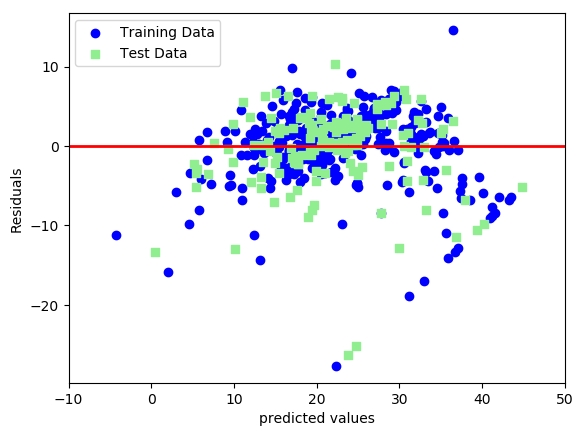

In [32]:
plt.scatter(y_train_pred,y_train_pred-y_train,c="blue",marker='o',label="Training Data")
plt.scatter(y_test_pred,y_test_pred-y_test,c="lightgreen",marker='s',label="Test Data")
plt.xlabel("predicted values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0,xmin=-10,xmax=50,lw=2,color='red')
plt.xlim([-10,50])
plt.show()


In [33]:
from sklearn.metrics import mean_squared_error
print("MSE train: {},test:.{}".format(mean_squared_error(y_train,y_train_pred),mean_squared_error(y_test,y_test_pred)))

MSE train: 19.95821981423805,test:.27.195965766883422


In [34]:
from sklearn.metrics import r2_score
print("R2 train:{},test:{}".format(r2_score(y_train,y_train_pred),r2_score(y_test,y_test_pred)))

R2 train:0.7645451026942549,test:0.673382550640017


Text(0,0.5,'price in $1000 [MEDV]')

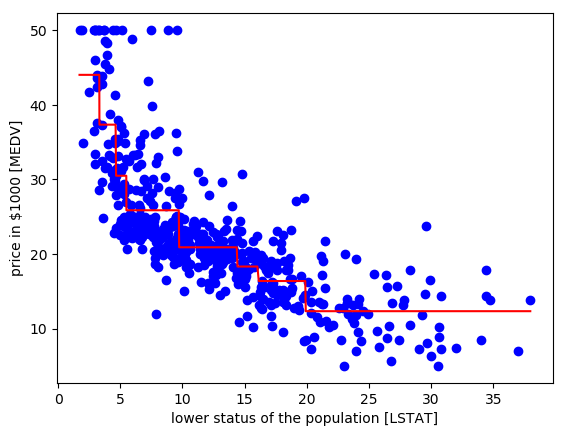

In [46]:
from sklearn.tree import DecisionTreeRegressor
X=df[["LSTAT"]].values
y=df["MEDV"].values
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X,y)
sort_idx = X.flatten().argsort()
lin_regplot(X[sort_idx],y[sort_idx],tree)
plt.xlabel('lower status of the population [LSTAT]')
plt.ylabel('price in $1000 [MEDV]')

In [52]:
X= df.iloc[:, :-1].values
y=df['MEDV'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=1)

In [54]:
from sklearn.ensemble import RandomForestRegressor as RFR
forest = RFR(n_estimators=1000,criterion='mse',random_state=1,n_jobs=1)
forest.fit(X_train,y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

In [57]:
print("MSE train:{},test: {}".format(mean_squared_error(y_train,y_train_pred),mean_squared_error(y_train,y_train_pred)))
print("R2 train:{},test:{}".format(r2_score(y_train,y_train_pred),r2_score(y_test,y_test_pred)))

MSE train:1.6414409895378974,test: 1.6414409895378974
R2 train:0.9794899516412922,test:0.8775836858654068


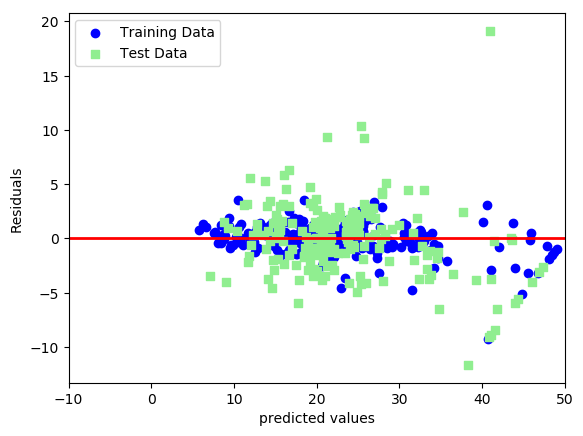

In [58]:
plt.scatter(y_train_pred,y_train_pred-y_train,c="blue",marker='o',label="Training Data")
plt.scatter(y_test_pred,y_test_pred-y_test,c="lightgreen",marker='s',label="Test Data")
plt.xlabel("predicted values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0,xmin=-10,xmax=50,lw=2,color='red')
plt.xlim([-10,50])
plt.show()


In [59]:
print(df.iloc[:, :-1])

         CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0     0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296.0   
1     0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242.0   
2     0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242.0   
3     0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222.0   
4     0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222.0   
5     0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222.0   
6     0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311.0   
7     0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311.0   
8     0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311.0   
9     0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311.0   
10    0.22489  12.5   7.87     0  0.524  6.377   94.3  6.3467    5  311.0   
11    0.11747  12.5   7.87     0  0.524  6.009   82.9  6.2267    5  311.0   